In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [2]:
df = pd.read_csv('./data/Daily_Demand_Forecasting_Orders.csv', delimiter=';')

In [3]:
df.columns

Index(['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

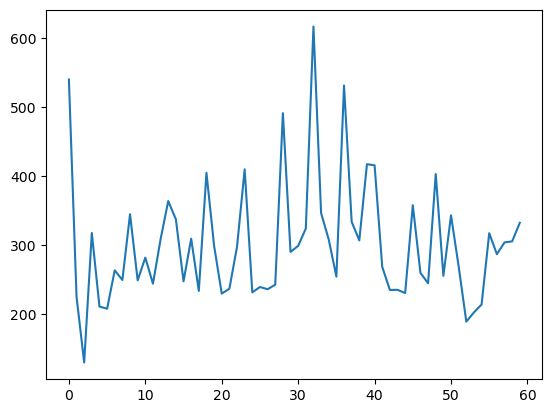

In [4]:
data = df['Target (Total orders)']
plt.plot(data)
plt.show()

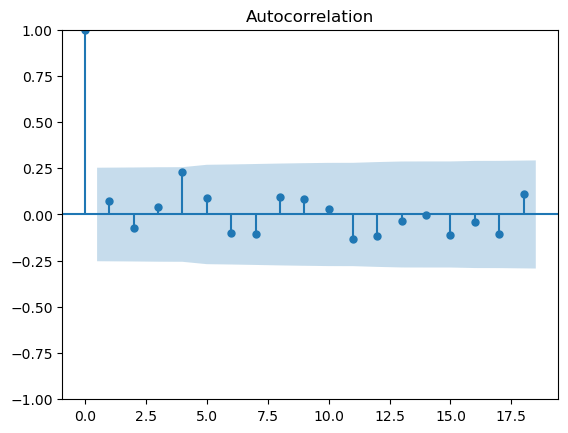

In [5]:
plot_acf(data)
plt.show()

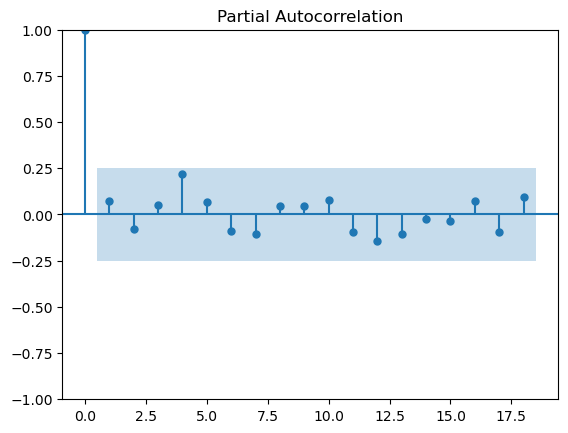

In [6]:
plot_pacf(data)
plt.show()

In [7]:
# 다양한 ARIMA 모델 적용
model1 = ARIMA(data, order=(1,0,0))
model2 = ARIMA(data, order=(0,0,1))
model3 = ARIMA(data, order=(1,0,1))

res1 = model1.fit()
res2 = model2.fit()
res3 = model3.fit()

In [8]:
# ARIMA model1 결과
print(res1.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 0)   Log Likelihood                -354.181
Date:                   Thu, 11 Sep 2025   AIC                            714.362
Time:                           12:42:30   BIC                            720.645
Sample:                                0   HQIC                           716.819
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.0429     17.323     17.378      0.000     267.090     334.995
ar.L1          0.0804      0.187      0.430      0.667      -0.286       0.447
sigma2      7848.5795   1363

In [9]:
# ARIMA model2 결과
print(res2.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(0, 0, 1)   Log Likelihood                -354.143
Date:                   Thu, 11 Sep 2025   AIC                            714.286
Time:                           12:42:30   BIC                            720.569
Sample:                                0   HQIC                           716.743
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.3222     17.628     17.094      0.000     266.773     335.872
ma.L1          0.0982      0.179      0.548      0.583      -0.253       0.449
sigma2      7837.9597   1382

In [10]:
# ARIMA model3 결과
print(res3.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 1)   Log Likelihood                -354.075
Date:                   Thu, 11 Sep 2025   AIC                            716.150
Time:                           12:42:30   BIC                            724.528
Sample:                                0   HQIC                           719.427
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.2370     17.534     17.180      0.000     266.871     335.603
ar.L1         -0.2589      1.442     -0.180      0.857      -3.085       2.567
ma.L1          0.3581      1

In [11]:
predictions = res2.fittedvalues

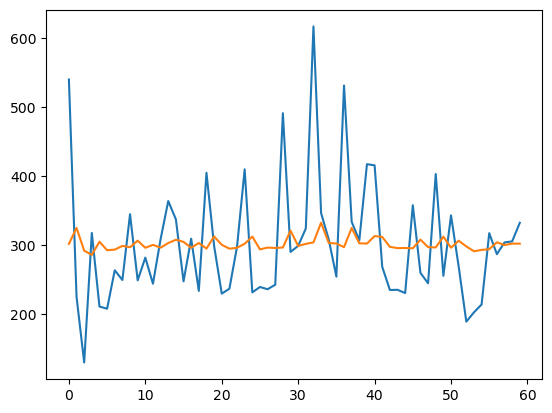

In [12]:
plt.figure()
plt.plot(data)
plt.plot(predictions)
plt.show()

In [13]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Auto ARIMA
model = pm.AutoARIMA(seasonal=False, stepwise=True, suppress_warnings=True, trace=True)
res = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=862.092, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=747.489, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=818.332, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=741.019, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=735.047, Time=0.02 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=724.987, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=723.726, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=722.186, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=791.913, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=716.399, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=714.286, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=712.710, Time=0.0

In [14]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                -354.355
Date:                Thu, 11 Sep 2025   AIC                            712.710
Time:                        12:42:30   BIC                            716.898
Sample:                             0   HQIC                           714.348
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    300.8733     15.236     19.747      0.000     271.011     330.736
sigma2      7894.7169   1313.366      6.011      0.000    5320.567    1.05e+04
Ljung-Box (L1) (Q):                   0.33   Jarque-

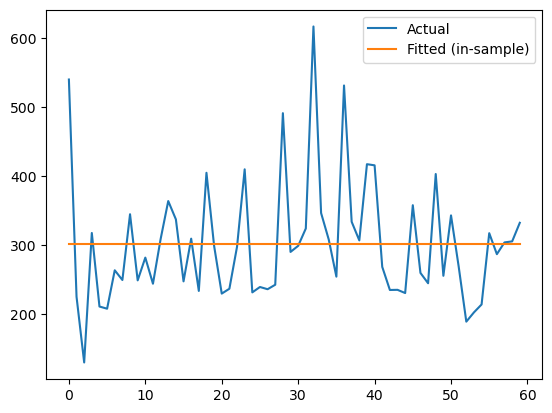

In [15]:
pred_in_sample = res.predict_in_sample()

plt.figure()
plt.plot(data, label='Actual')
plt.plot(pred_in_sample, label='Fitted (in-sample)')
plt.legend()
plt.show()

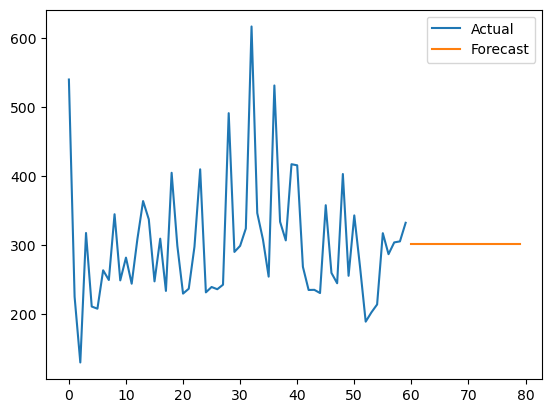

In [16]:
# n_periods만큼 미래 예측
future_forecast = model.predict(n_periods=20)

plt.figure()
plt.plot(data, label='Actual')
plt.plot(range(len(data), len(data)+20), future_forecast, label='Forecast')
plt.legend()
plt.show()